### Este es el ejemplo 4.3. Problema del Apostador (Gambler’s Problem) del libro de Sutton. (ejercicio clase 3)

Un apostador tiene la oportunidad de hacer apuestas a los resultados de una secuencia de tiros de una moneda. 
Si la moneda cae cara, gana tantos dólares como apostó en esa tirada.
Si la moneda cae ceca, pierde lo apostado. El juego termina cuando un apostador gana alcanzando su objetivo de $100, o pierde quedándose sin dinero.

En cada tirada el apostador debe decidir qué porción de su capital quiere apostar, una cantidad entera de dólares.
El problema puede ser formulado como un MDP finito sin descuento, episódico.

Los estados posibles del capital del apostador son: s ∈ {1, 2, . . . , 99}.

La acciones son apuestas,  a ∈ {0, 1, . . . , min(s, 100 − s)}. 

La recompensa es cero en todas las transiciones excepto en aquellas en que el apostador alcanza su objetivo, en que la recompensa es +1.

La función de estado-valor da la probabilidad de ganar desde cada estado. Una política es una función de niveles de capital a apuestas. La política óptima maximiza la probabilidad de obtener el objetivo. Llamemos p_h la probabilidad de que una moneda salga cara. Si p_h es conocida, entonces el problema se puede resolver, por ejemplo, con iteración de valor.

In [44]:
import numpy as np
import sys

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 9)

if "../" not in sys.path:
  sys.path.append("../") 


### Exercise

Implementar iteración de valor para el problema del apostador y resolverlo para p_h = 0.25 y p_h = 0.55.


In [69]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probabilidad de que una moneda caiga cara
    """
    
    def one_step_lookahead(s, V, rewards):
        """
        Función auxiliar que calcula el valor de todas las acciones dado un estado.
        
        Args:
            s: El capital del apostador. Entero.
            V: El vector que contiene los valores en cada estado.
            rewards: El vector recompensa.
                        
        Returns:
            Un vector que contiene el valor esperado de cada acción.
            Su longitud es igual a la cantidad de acciones.
        """
        nr_actions = min(s, 100 - s) + 1
        A = np.zeros(nr_actions)
        
        for a in range(nr_actions):
            value_win = p_h * (rewards[s + a] + discount_factor * V[s + a])
            value_loss = (1 - p_h) * (rewards[s - a] + discount_factor * V[s - a])
            A[a] = value_win + value_loss
        
        return A
    
    
    V = np.zeros(101)
    policy = np.zeros(101)
    rewards = np.zeros(101)
    rewards[100] = 1
    
    while True:
        delta = 0
        for s in range(1, 100):
            v = V[s]
            V[s] = one_step_lookahead(s, V, rewards).max()
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    
    for s in range(1, 100):
        v_ahead = one_step_lookahead(s, V, rewards)
        choices = np.argwhere(v_ahead == np.amax(v_ahead)).flatten()
        policy[s] = np.random.choice(choices, size=1)
    
    return policy[1:100], V[1:100]

In [87]:
policy, v = value_iteration_for_gamblers(0.25)

print("Política optimizada:")
print(policy)
print("")

print("Función de valor óptima:")
print(v)
print("")

Política optimizada:
[ 0.  2.  0.  4.  5.  6.  7.  8.  9.  0. 11. 12. 12.  0. 15. 16. 17. 18.
 19. 20. 21.  0. 23. 24. 25. 26. 27.  0.  4. 30.  6. 18. 33. 34. 10. 11.
 12. 38. 11. 40. 41. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.  4.
  5.  6.  0.  8.  9. 10.  0. 12. 13.  0. 10.  9. 17. 32. 19. 30. 21. 22.
 23. 24.  0.  1.  2.  0.  4.  5.  6.  0. 17. 16. 15. 11. 12. 12. 11. 10.
  9.  8.  0.  0.  5.  0.  0.  0.  1.]

Función de valor óptima:
[7.24792480e-05 2.89916992e-04 6.95257448e-04 1.16010383e-03
 1.76906586e-03 2.78102979e-03 4.03504074e-03 4.66214120e-03
 5.59997559e-03 7.08471239e-03 9.03964043e-03 1.11241192e-02
 1.56793594e-02 1.61464431e-02 1.69517994e-02 1.86512806e-02
 1.98249817e-02 2.24047303e-02 2.73845196e-02 2.83388495e-02
 3.04937363e-02 3.61633897e-02 3.84953022e-02 4.44964767e-02
 6.25000000e-02 6.27174377e-02 6.33700779e-02 6.45857723e-02
 6.59966059e-02 6.78135343e-02 7.08430894e-02 7.46098323e-02
 7.64884604e-02 7.93035477e-02 8.37541372e-02 8.96225423e-02
 

<BarContainer object of 99 artists>

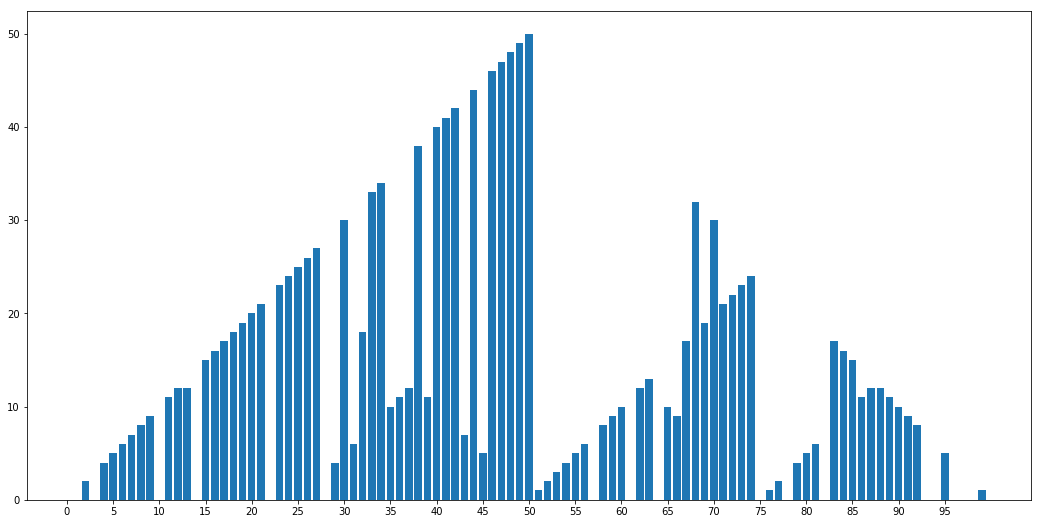

In [88]:
plt.xticks(np.arange(0, 100, step=5))
plt.bar(range(1, 100), policy)

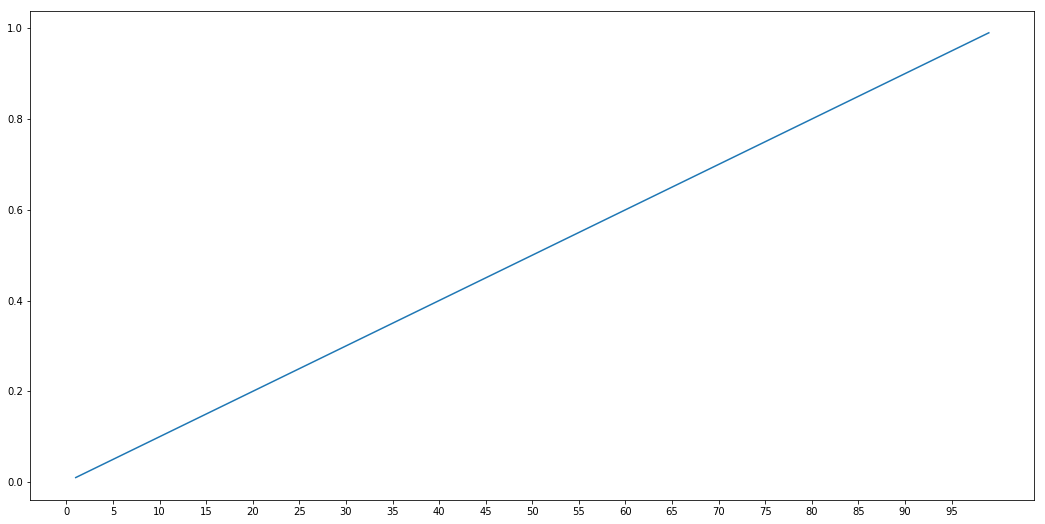

In [86]:
plt.xticks(np.arange(0, 100, step=5))
plt.plot(range(1, 100), v)